# TED Talks Popularity Analysis 

Yawen Han

Feb 7th, 2018

TED is a nonprofit organization devoted to spreading ideas, usually in the form of short, powerful talks with a time restriction of 18 minutes. It aims to provide a platform for thinkers, visionaries and teachers, so that people around the globe can gain a better understanding of the biggest issues faced by the world, and feed a desire to help create a better future. From 2006 up to now, thousands of great TED Talks videos have been published to spread great ideas and change the world. Many factors can amplify the power of ideas: the duration of the videos, the occupation of speakers, the available languages related, the published time, etc. The objective of this report is to explore the related factors that might influence the popularity of TED talks and how these factors influence the popularity.

### Dataset Overview 

The dataset used in this report is the "ted_main" dataset that has been collected regarding "TED Talks" at Kaggle. This dataset contains information about all audio-video recordings of TED Talks published to the official TED.com website until September 21st, 2017. It contains information about all talks including name, title, main_speaker, speaker_occupation, duration, film_date, published_date, languages, views, etc.

In [1]:
#Loading several helpful packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import re
#Loading data
ted = pd.read_csv('/Users/yawenhan/Documents/Python/ted_main.csv')
# Reorder the columns into a more readable format
ted=ted[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]
# Change the expression of film date and published date into a easier readable format
ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

To find out the relationship between popularity of talks and various other factors. It is supposed that the popularity of a talk is represented by its total number of views. First, find out the basic information of the dataset. 

In [2]:
# Find out the basic information of the dataset
print('The total number of TED Talks is {}'.format(ted.shape[0]))

The total number of TED Talks is 2550


It indicates that there are 2550 talks have ever been posted on the TED Platform until September 21, 2017. Next, find out the 10 most popular TED talks with the top 10 total number of views.

In [3]:
# Top 10 popular TED talks
pop_talks=ted[['title','main_speaker','published_date','views']].sort_values('views', ascending=False)[:10]
pop_talks

,title,main_speaker,published_date,views
0,Do schools kill creativity?,Ken Robinson,26-06-2006,47227110
1346,Your body language may shape who you are,Amy Cuddy,01-10-2012,43155405
677,How great leaders inspire action,Simon Sinek,04-05-2010,34309432
837,The power of vulnerability,Bren�� Brown,23-12-2010,31168150
452,10 things you didn't know about orgasm,Mary Roach,19-05-2009,22270883
1776,How to speak so that people want to listen,Julian Treasure,27-06-2014,21594632
201,My stroke of insight,Jill Bolte Taylor,11-03-2008,21190883
5,Why we do what we do,Tony Robbins,27-06-2006,20685401
2114,This is what happens when you reply to spam email,James Veitch,08-01-2016,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,16-01-2013,19787465


From the above table, Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk with 47.2 million views. It's interesting to learn that it's the oldest video in published date in all 10 videos. Moreover, 8 out of 10 movies are published before year 2012, so published date might be a factor that related to total number of views. This also works on common sense as more probability been viewed with a longer published time. The relationship between popularity and published date will be discussed later in this report. Finally, investigate the summary statistics and the distribution of the views garnered on various TED Talks. To summarize the statistics of the views, the Five-Number Summary and plotbox is given below.

In [4]:
# Find out the summary statistics of the views on all TED talks
print(ted['views'].describe())

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64


The average number of views on TED Talks in 1.6 million, and the median number of views is 1.12 million. This suggests a very high average level of popularity of TED Talks. Additionally, it is noticed that 75% talks have views less than 1.8 million, so 3 million is used as the cutoff point to delete outliers when constructing boxplot and distribution plot.

The number of extreme high level popularity TED talks is 299
The percentage of these outliers is 11.73%


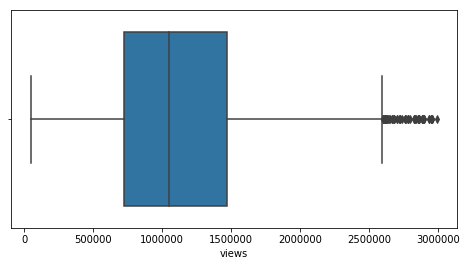

In [5]:
plt.figure(figsize=(8,4))
ax=sns.boxplot(x=ted[ted['views']<3e6]['views'])
print('The number of extreme high level popularity TED talks is {}'.format(ted[ted['views']>2.7e6]['views'].count()))
print('The percentage of these outliers is {0:.2f}%'.format(100.0*(ted[ted['views']>2.7e6]['views'].count())/2550.0))

From the boxplot above, the 25%-75% of views does not have the interquartile range less than 1 million, which is much smaller than the sample range. The sample range is really big with lots of outliers on the right side, indicating some extremely high level of popularity of TED Talks. It is observed that the cutoff point for outliers is around 2.7 million, and the number of outliers is 299 with a percentage of 11.73%. In addition, it is clearly showed that 'views' is not symmetrically distributed and might right skewed from the boxplot. This conclusion can be checked with the distribution plot below.

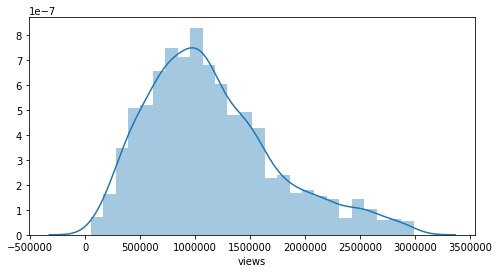

In [6]:
# Ignoring the influence of extreme value, and have a closer look of the distribution
plt.figure(figsize=(8,4))
sns.distplot(ted[ted['views']<3e6]['views'])

Based on the observations above, there is a very high average level of popularity of TED Talks around 1.6 million views for the past of years. Most of the videos had a relatively stable views around 1.2 million, while nearly 12% of videos had an extremely high view that more than 3 million. If simply predicting the popularity of TED Talks in the future by the past data, it can be concluded that the TED Talks will still have a high-level popularity around 1.5 million, but maybe 10% percent of them will have an extremely high view that more than 3 million.

### Popularity and Duration/Languages

In this section, the relationship between popularity (total number of views) and duration/languages will be explored. Duration is one remarkable aspect of TED Talks, as TED is famous for imposing a time limit of 18 minutes for each talk. Some very basic data visualization and descriptive statistics about the relationship between the popularity of talks and the length of the talks are shown below:

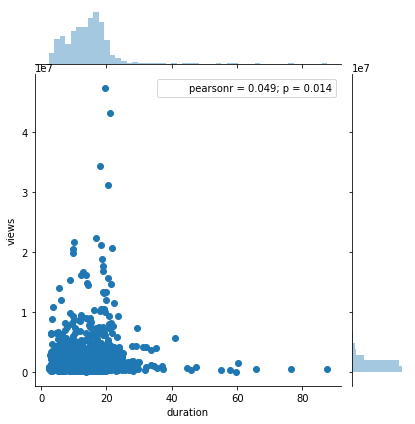

In [7]:
# Use scatterplot to check if number of views is correlated with duration
ted['duration']=ted['duration']/60 #convert from seconds to minutes
sns.jointplot(x=ted['duration'],y=ted['views'])
#plt.figure(figsize=(5,5))
#plt.scatter(ted['duration'], ted['views'], alpha=0.5)
#plt.show()

As the scatterplot above shows, there seems to be almost no correlation between these two factors. Considering TED talks have a time limit around 18 minutes, the videos that have a duration more than 30 minutes are considered from external resources instead of real TED talks. Therefore, the duration that more than 30 minutes can be viewed as outliers. Try to do the scatterplot again, and evaluate the result.

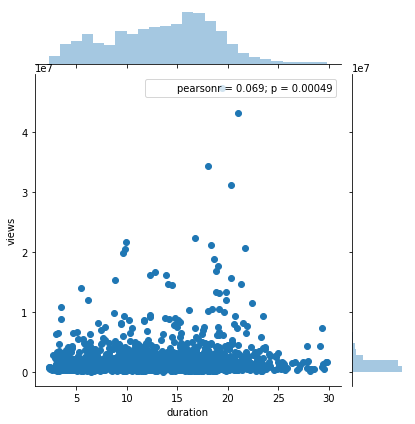

In [8]:
# Redraw the scatter plot by removing the outliers
ted_dur=ted[ted['duration']<=30]
sns.jointplot(x=ted_dur['duration'],y=ted_dur['views'])
#plt.figure(figsize=(5,5))
#plt.scatter(ted_dur['duration'], ted_dur['views'], alpha=0.5)
#plt.show()

As the scatterplot above shows, it still represents no correlation between views and duration. The correlation coefficient will be calculated later for a more accurate conclusion. Apart from duration, the number of available languages is also considered as an implication of popularity. As the more languages accessible to this video, the larger chance it will be viewed by people from different culture.Some very basic data visualization and descriptive statistics about the relationship between the popularity of talks and available languages are shown below:

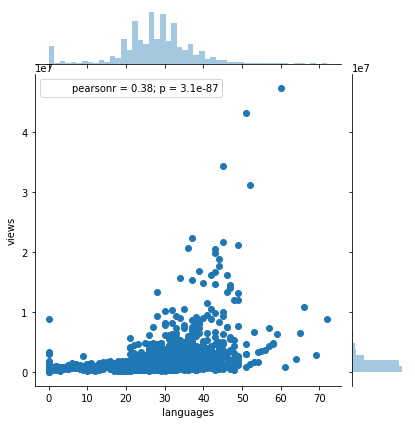

In [9]:
# Use scatterplot to check if number of views is correlated with available languages
sns.jointplot(x=ted['languages'],y=ted['views'])
#plt.figure(figsize=(5,5))
#plt.scatter(ted['languages'], ted['views'], alpha=0.5)
#plt.show()

As the scatterplot above shows, it seems there is a positive correlation between views and languages. To have a more clear view of the correlation between the sets of three factors: views, duration and languages, a correlation matrix is built to see which pairs have the highest correlation. 

In [10]:
ted_dur[['duration','languages','views']].corr()

,duration,languages,views
duration,1.000000,-0.255646,0.069243
languages,-0.255646,1.000000,0.378508
views,0.069243,0.378508,1.000000


From the correlation matrix above, views and languages has the highest positive correlation of 0.38, suggesting a medium positive correlation between two quantities - as available languages increases so does the views. Other pairs seem has no correlation inside. Based on the observation above, it can be concluded that there is no correlation between the popularity of TED Talks and the duration, but there is a positive medium correlation between popularity and number available languages.

### Popularity and Speaker Occupation

In this section, the relationship between popularity (total number of views) and speaker occupation will be explored. In TED talks, although the roster of presenters broadened to include scientists, philosophers, musicians, business and religious leaders, philanthropists and many others, it's interested to learn the speaker from which occupation that attracted more attention worldwide. Before tackling some basic data visualization about the relationship between the popularity of talks and speaker occupation, some data cleaning should be processed on 'speaker_occupation' column to group similar occupations together.

In [11]:
# Convert and group speaker occupation into tags
ted['occupation_tag'] = ted['speaker_occupation'].apply(lambda x: str(x).lower().strip())
# Manipulating singer/songwriter
ted['occupation_tag'] = ted['occupation_tag'].str.replace('singer/songwriter', 'singer, songwriter')
ted['occupation_tag'] = ted['occupation_tag'].str.replace('singer-songwriter', 'singer, songwriter')
# Multiple occupations are expressed in ', ', '; ' or ' and '
ted['occupation_tag'] = ted['occupation_tag'].apply(lambda x: re.split(',\s|;\s|\sand\s', x))
# Assigning 'activist' label to all kinds of 'x activist'; same for 'x author', 'x writer', 'x artist'
target = ['activist', 'author', 'writer', 'artist']
def act_add(occ_list, target):
    for word in target:
        if occ_list.count(word) == 0:
            for occ in occ_list:
                if occ.count(' ' + word) > 0:
                    occ_list.append(word)
                    break
    return occ_list
ted['occupation_tag'] = ted['occupation_tag'].apply(lambda x: act_add(x, target))
# Use the map to store total number of views corresponds to occupation
all_views = {}
i=-1
for talk in ted['occupation_tag']:
    i=i+1
    for occupation in talk:   
        if not occupation in all_views:
            all_views[occupation] = ted['views'][i]
        else:
            all_views[occupation] += ted['views'][i]
occ_df = pd.DataFrame.from_dict(all_views, orient = 'index').reset_index()
occ_df.columns = ['Occupation','Views']
jobs = occ_df.sort_values('Views', ascending=False)
print('Occupation numbers:{}'.format(len(jobs['Occupation'])))

Occupation numbers:1291


According to the output above, the total number of occupation in records is more than 1000. To simplify the analysis process, only top 10 occupations with most views are chosen for analysis.

In [12]:
topjobs=jobs.head(10)
topjobs

,Occupation,Views
661,writer,270860018
425,activist,199983344
908,author,156684431
701,artist,150423291
48,psychologist,122295841
1135,entrepreneur,100180366
565,comedian,83100460
270,designer,76853348
582,educator,76582561
1086,journalist,74042387


From the table above, writer is the most popular speaker occupation with more than 270 million views in total, and is the only one speaker occupation that exceeds 200 million views. In the top 5 popular speaker occupation, 3 occupations are from the Art background including writer, author and artist, which implies a possible audience tendency on Art field for TED talks. To compare the popularity among different occupation categories and the percentage of each category, a bar chart and a pie chart are built in top 10 popular occupations for further observation.

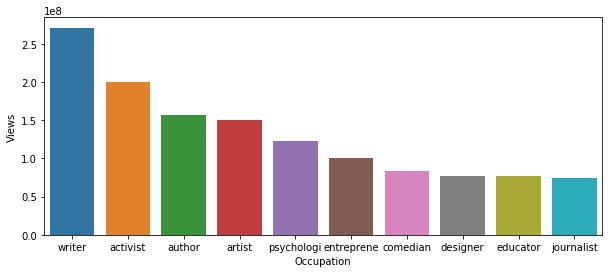

In [13]:
# Use bar chart to represent occupations with top 10 views
jobs['Occupation'] = jobs['Occupation'].apply(lambda x: x[:10])
plt.figure(figsize=(10,4))
sns.barplot(x=topjobs['Occupation'],y=topjobs['Views'])

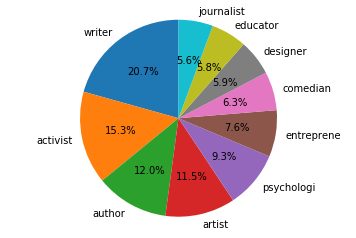

In [14]:
# pie chart
plt.pie(topjobs['Views'], labels=topjobs['Occupation'], startangle=90, autopct='%.1f%%')
plt.axis('equal')
plt.figure(figsize=(10,10))
plt.show()

From the bar chart and pie chart above, it clearly reflects the relative proportions popularity of different speaker occupations. Both charts readdressed the absolute popularity of writer with the percentage more than 20. The activist is the second popular speaker occupation, follows by author, artist, psychology, etc. There are only 4 occupations has more than 10 percentage, and 3 of them from Art field while 1 from Sociology field.

According to the observations above, it can be concluded that most audiences have a preference for the speaker from the Art or Sociology background when they watching TED talks videos. Those TED Talks videos whose speaker are from Art or Sociology field are possibly more popular than others.

### Popularity with Published Year

As stated above in overview: published date might be a factor that related to popularity(total number of views), and it also seems reasonable in a common sense. In this section, the relationship between popularity and published date will be discussed. Before tackling some basic data visualization, the data first be processed by extracting the year from the 'published_year' column and grouping the 'views' from same published year together. Then plot a line chart reflecting the change of total number of views from 1994-2016. (Deleting year 2017 as there is only half year of data collected for year 2017)

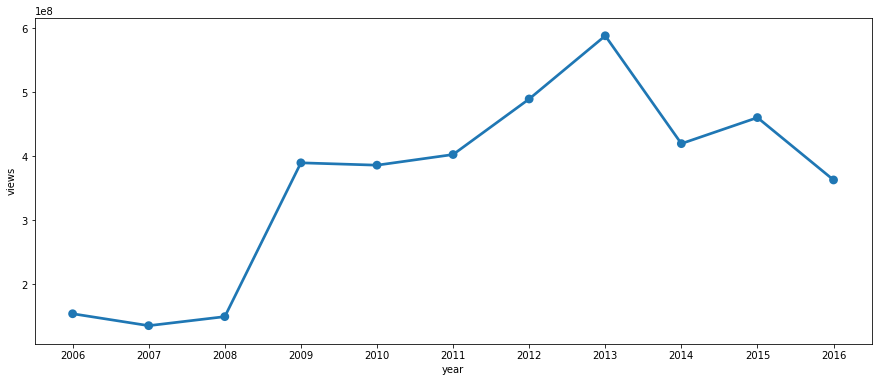

In [15]:
ted['year'] = ted['film_date'].apply(lambda x: x.split('-')[2])
ted['year'] = map(int,ted['year'])
year_list = range(2006, 2018)
# Use the map to store total number of views corresponds to published year
time_views = {}
for time in year_list:
    time_views[time] = 0
    j=-1
    for year in ted['year']: 
        j=j+1
        if year==time:
            time_views[time] += ted['views'][j]
            
year_df = pd.DataFrame.from_dict(time_views, orient = 'index').reset_index()
year_df.columns = ['year','views']
plt.figure(figsize=(15,6))
sns.pointplot(x='year', y='views', data=year_df[year_df['year']<2017])

From the line chart above, the number of views is kept increasing in year 2006-2013 and reaches the maximum value in year 2013, then have a little fall and keep constant at 400 million in year 2014-2016. Therefore, it might be interesting to know the reasons behind 2009 being the tipping point where the number of views increased more than twofold, and the reasons behind 2013 being the optimal point where get the maximum views. Additionally, If simply predicting the popularity of TED Talks in the future by the past data, the total number of views for next three years have a great possibility to be stable at 400 million.

### Reference

https://www.kaggle.com/holfyuen/ted-talks-by-tags-and-speaker-occupation

https://www.kaggle.com/rounakbanik/ted-data-analysis

In [16]:
import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
#di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code